# Regresión Lineal Simple

La regresión simple es un método estadístico utilizado para analizar la relación entre dos variables: una variable independiente (X) y una variable dependiente (Y). El objetivo es encontrar una ecuación que represente la relación entre estas dos variables de la forma más precisa posible.

En la regresión simple, se asume que la relación entre X e Y puede ser aproximada por una línea recta. La ecuación de esta línea se representa como Y = a + bX, donde "a" es la intersección en el eje Y (cuando X es igual a cero) y "b" es la pendiente de la línea.

Para encontrar los valores de "a" y "b", se utiliza el método de los mínimos cuadrados, que busca minimizar la suma de los cuadrados de las diferencias entre los valores observados de Y y los valores predichos por la ecuación de regresión.

Una vez obtenidos los valores de "a" y "b", es posible utilizar la ecuación de regresión para predecir valores de Y para diferentes valores de X. Sin embargo, es importante tener en cuenta que la regresión simple solo puede establecer una relación de causa y efecto entre las variables si se cumplen ciertas condiciones y se han realizado pruebas adicionales.

Espero que esta explicación te haya sido útil. Si tienes alguna otra pregunta, no dudes en hacerla.

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [5]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Escalado de variables

In [9]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [10]:
X_train,X_test

(array([[-0.72313942],
        [ 0.14620852],
        [-0.60459198],
        [-0.09088638],
        [ 1.37119879],
        [ 0.81797738],
        [-1.35539247],
        [ 2.28006255],
        [-0.68362361],
        [-0.99975013],
        [ 0.46233504],
        [ 0.50185086],
        [-0.4070129 ],
        [-0.60459198],
        [ 1.68732532],
        [-1.07878176],
        [-1.4344241 ],
        [ 0.93652482],
        [ 0.06717689],
        [-0.28846545]]),
 array([[-1.27636084],
        [ 2.20103092],
        [-0.24894964],
        [-0.32798127],
        [ 1.88490439],
        [ 1.56877787],
        [ 1.92442021],
        [-0.28846545],
        [ 0.22524015],
        [ 1.25265135]]))

# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
regression.score(X_train, y_train)

0.9381900012894278

# Predecir el conjunto de test

In [14]:
y_pred = regression.predict(X_test)

In [15]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [20]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [25]:
# evaluar con los datos de test
regression.score(X_test, y_test)

0.9749154407708353

## Calcular el error cuadrático medio

In [23]:
# Calcular el error cuadrático medio
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) ** (0.5)


4585.4157204675885

In [26]:
# calcular rmse con numpy
np.mean((y_pred - y_test)**2)** (0.5)

4585.4157204675885

______


In [27]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)
mse

0.375

In [29]:
import numpy as np
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mse = (np.square(y_true - y_pred)).mean()
mse

0.375

# Visualizar los resultados de entrenamiento

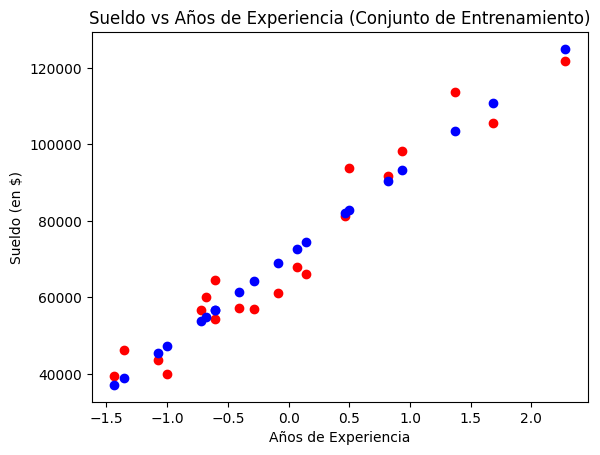

In [26]:
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

# Visualizar los resultados de test


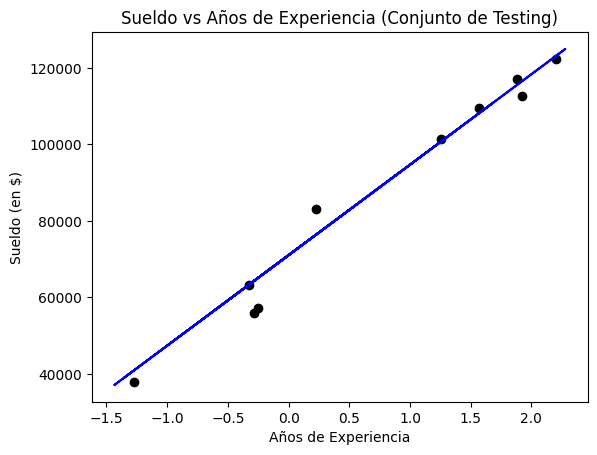

In [35]:
plt.scatter(X_test, y_test, color = "black")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

In [45]:
años_15 = sc_X.transform([[15]] )
años_15

array([[4.05827424]])

In [53]:
sc_X.inverse_transform(años_15)

array([[15.]])

In [46]:
sueldo_15 = regression.predict(años_15)

In [47]:
sueldo_15

array([167005.32889087])

In [57]:
X_train.ravel()

array([-0.72313942,  0.14620852, -0.60459198, -0.09088638,  1.37119879,
        0.81797738, -1.35539247,  2.28006255, -0.68362361, -0.99975013,
        0.46233504,  0.50185086, -0.4070129 , -0.60459198,  1.68732532,
       -1.07878176, -1.4344241 ,  0.93652482,  0.06717689, -0.28846545])

In [63]:
sc_X.inverse_transform(X_train).ravel()

array([ 2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3, 10.5,  3. ,  2.2,  5.9,
        6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,  4.9,  4. ])

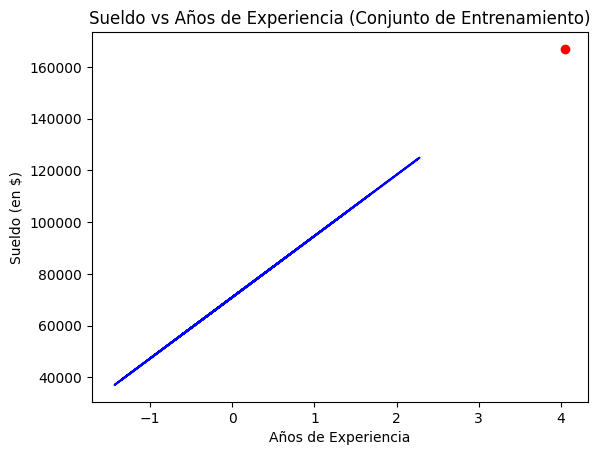

In [76]:
plt.scatter(años_15, sueldo_15, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
# plt.xticks(sc_X.inverse_transform(X_train).ravel().astype(int))
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

In [72]:
sc_X.inverse_transform([list(range(-1,5))]).astype(int)

array([[ 2,  4,  7,  9, 12, 14]])